## Import necessary libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
company_data = pd.read_csv('Company_Data (2).csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data understanding

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company_data['Sales'].nunique()

336

## Convert Sales feature into category

In [7]:
company_data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
company_data['Sales'] = pd.cut(company_data['Sales'],bins=2,labels=np.arange(2),right=False)

In [9]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
company_data2 = company_data.copy()

## Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
company_data2['ShelveLoc'] = le.fit_transform(company_data2['ShelveLoc'])
company_data2['Urban']     = le.fit_transform(company_data2['Urban'])
company_data2['US']        = le.fit_transform(company_data2['US'])

In [13]:
X = company_data2.drop(labels='Sales',axis=1)
y = company_data2[['Sales']]

## Standard Scalar

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_scale = StandardScaler()
scaled_X  = std_scale.fit_transform(X)
scaled_X  = pd.DataFrame(scaled_X,columns=X.columns)

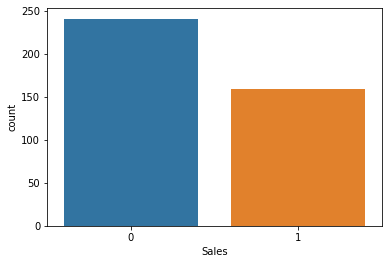

In [16]:
sns.countplot(x='Sales',data=company_data2)
plt.show()

### Observation

#### Sales data is imbalance

## Split train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320, 1), (80, 1))

## Model Training | Testing | Evaluation

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred   = rf_model.predict(X_test)

print('accuracy score        :',accuracy_score(y_test,y_pred))
print('precision score       :',precision_score(y_test,y_pred))
print('recall score         :',recall_score(y_test,y_pred))
print('confusion matrix      :\n',confusion_matrix(y_test,y_pred))

accuracy score        : 0.8125
precision score       : 0.8148148148148148
recall score         : 0.6875
confusion matrix      :
 [[43  5]
 [10 22]]


## Gridsearch cv

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid_cv = GridSearchCV(estimator=rf_model,param_grid={
    'criterion'   :['gini','entropy'],
    'max_depth'   :range(5,11)
    
})
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 11)})

In [24]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [25]:
rf_model = RandomForestClassifier(criterion='entropy',max_depth=9,class_weight={1:2},random_state=13)
rf_model.fit(X_train,y_train)
y_pred   = rf_model.predict(X_test)

print('accuracy score       :',round(accuracy_score(y_test,y_pred),4))
print('precision score      :',round(precision_score(y_test,y_pred),4))
print('recall score         :',round(recall_score(y_test,y_pred),4))
print('confusion matrix     :\n',confusion_matrix(y_test,y_pred))

accuracy score       : 0.85
precision score      : 0.8846
recall score         : 0.7188
confusion matrix     :
 [[45  3]
 [ 9 23]]


### Observation

### we get accuracy 85%

## =============================End=======================================